In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('NYChousing.csv')

In [3]:
housing.shape

(2506, 22)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   UID                             2506 non-null   int64  
 1   PropertyName                    2506 non-null   object 
 2   Lon                             2491 non-null   float64
 3   Lat                             2491 non-null   float64
 4   AgencyID                        2506 non-null   object 
 5   Name                            2495 non-null   object 
 6   Value                           2454 non-null   float64
 7   Address                         2461 non-null   object 
 8   Violations2010                  2506 non-null   int64  
 9   REACNumber                      633 non-null    float64
 10  Borough                         2506 non-null   object 
 11  CD                              2506 non-null   object 
 12  CityCouncilDistrict             24

## Display Columns name

In [5]:
for col in housing.columns:
    print(col)

UID
PropertyName
Lon
Lat
AgencyID
Name
Value
Address
Violations2010
REACNumber
Borough
CD
CityCouncilDistrict
CensusTract
BuildingCount
UnitCount
YearBuilt
Owner
Rental.Coop
OwnerProfitStatus
AffordabilityRestrictions
StartAffordabilityRestrictions


## Check how many null in the Data Set

In [6]:
housing.isnull().sum()

UID                                  0
PropertyName                         0
Lon                                 15
Lat                                 15
AgencyID                             0
Name                                11
Value                               52
Address                             45
Violations2010                       0
REACNumber                        1873
Borough                              0
CD                                   0
CityCouncilDistrict                 10
CensusTract                         19
BuildingCount                        0
UnitCount                            0
YearBuilt                            0
Owner                               29
Rental.Coop                          0
OwnerProfitStatus                 1164
AffordabilityRestrictions            0
StartAffordabilityRestrictions       5
dtype: int64

## Drop NA

In [7]:
housing = housing.dropna(subset = ['Value'])

In [8]:
housing.shape

(2454, 22)

## Check Quantile

In [9]:
housing["Value"].quantile([.25,.5,.75,])

0.25     266040.00
0.50     934889.00
0.75    2684850.75
Name: Value, dtype: float64

## Create New List in the data Frame

In [10]:
housing["HighValue"] = np.where((housing["Value"])> 2684851,"High","NotHigh")

In [11]:
filtered_data = housing.copy()

In [12]:
filtered_data.groupby(['HighValue', 'Borough']).size()

HighValue  Borough      
High       Bronx            137
           Brooklyn         132
           Manhattan        281
           Queens            48
           Staten Island     16
NotHigh    Bronx            527
           Brooklyn         697
           Manhattan        570
           Queens            29
           Staten Island     17
dtype: int64

In [13]:
housing['HighValue'].value_counts()

NotHigh    1840
High        614
Name: HighValue, dtype: int64

In [14]:
housing[["Borough","HighValue"]].value_counts()

Borough        HighValue
Brooklyn       NotHigh      697
Manhattan      NotHigh      570
Bronx          NotHigh      527
Manhattan      High         281
Bronx          High         137
Brooklyn       High         132
Queens         High          48
               NotHigh       29
Staten Island  NotHigh       17
               High          16
dtype: int64

In [15]:
print(" Percentage is  %.3f%%" %(137/(1840+614)))

 Percentage is  0.056%


In [16]:
np.mean(housing["HighValue"] == "High")

0.2502037489812551

In [17]:
np.mean(housing["Borough"] == "Bronx")

0.2705786471067645

In [18]:
import statistics

In [19]:
print('the probability is' ,0.05582722/((137+527)/(614+1840)))

the probability is 0.20632529801204816


## Create the Log value

In [20]:
housing["LogValue"] = np.log(housing['Value'])

## Summary

In [21]:
housing["LogValue"].describe()

count    2454.000000
mean       13.682298
std         1.810169
min         8.410053
25%        12.491402
50%        13.748183
75%        14.803136
max        20.471819
Name: LogValue, dtype: float64

## Create the Log unit

In [22]:
housing["LogUnit"] = np.log(housing['UnitCount'])

In [23]:
housing["after1950"] = np.where(housing["YearBuilt"] > 1950,'True','False')

In [24]:
housing.head()

,UID,PropertyName,Lon,Lat,AgencyID,Name,Value,Address,Violations2010,REACNumber,...,YearBuilt,Owner,Rental.Coop,OwnerProfitStatus,AffordabilityRestrictions,StartAffordabilityRestrictions,HighValue,LogValue,LogUnit,after1950
0,100000,1018 DEVELOPMENT,-73.892438,40.820604,BBL 2-02723-0040;HUD Property 800016127,1018 DEVELOPMENT,2041200.0,1010 EAST 163 STREET,3,94.0,...,1909,1018 DEVELOPMENT CO,Rental,NaN,Affordable,1979.0,NotHigh,14.529048,4.574711,False
1,100001,1041 BUSHWICK AVENUE APTS,-73.920654,40.691298,BBL 3-03331-0036;HUD Property 800016130,1041 BUSHWICK AVENUE APTS,897300.0,1041 BUSHWICK AVENUE,0,92.0,...,1924,1041 BUSHWICK AVE ASS,Rental,NaN,Affordable,1980.0,NotHigh,13.707146,3.871201,False
2,100002,1085 MANHATTAN DEVELOPMENT,-73.955473,40.735693,BBL 3-02495-0042;HUD Property 800016133,1085 MANHATTAN DEVELOPMENT,253490.0,1085 MANHATTAN AVENUE,0,98.0,...,1931,MANHATTAN AVE ASSOCS,Rental,NaN,Affordable,1978.0,NotHigh,12.443080,2.484907,False
3,100003,1184 DEVELOPMENT,-73.951268,40.667833,BBL 3-01282-0036;HUD Property 800016134,1184 DEVELOPMENT,306900.0,1184 PRESIDENT STREET,0,81.0,...,1915,1184 ASSOCIATES,Rental,NaN,Affordable,1981.0,NotHigh,12.634277,2.944439,False
4,100004,119 RALPH AVENUE,-73.923080,40.685983,BBL 3-01487-0005;HUD Property 800016135,119 RALPH AVENUE,30559.0,119 RALPH AVENUE,3,24.0,...,1905,"NIKKI KIND, INC",Rental,NaN,Not Affordable,1977.0,NotHigh,10.327415,1.945910,False


## EDA

Text(0.5, 1.0, '')

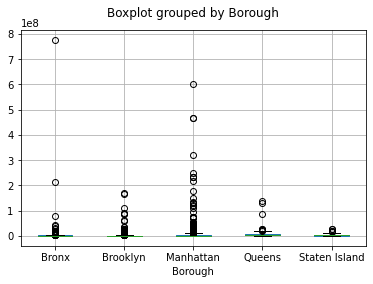

In [25]:
boxplot = housing.boxplot(column=['Value'],by='Borough')
plt.title("")

No handles with labels found to put in legend.


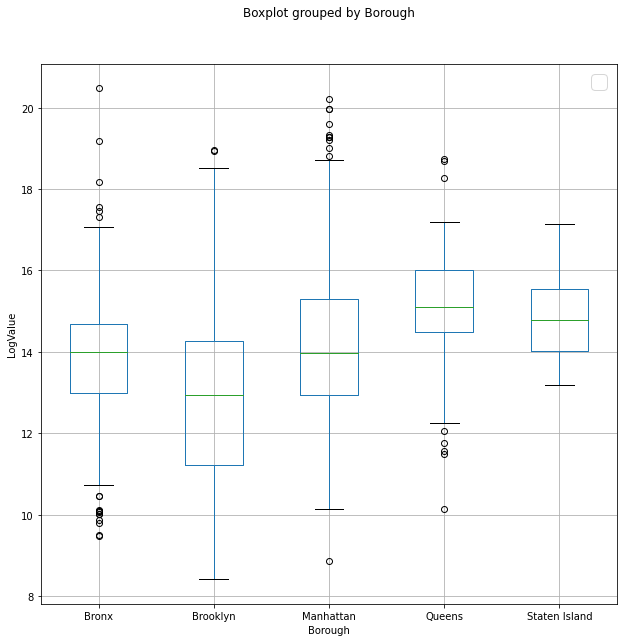

In [26]:
boxplot = housing.boxplot(column=['LogValue'],by='Borough',figsize=(10,10))
plt.title('')
plt.xlabel('Borough')
plt.ylabel("LogValue")
plt.legend(fontsize=20)

## Scatter plot

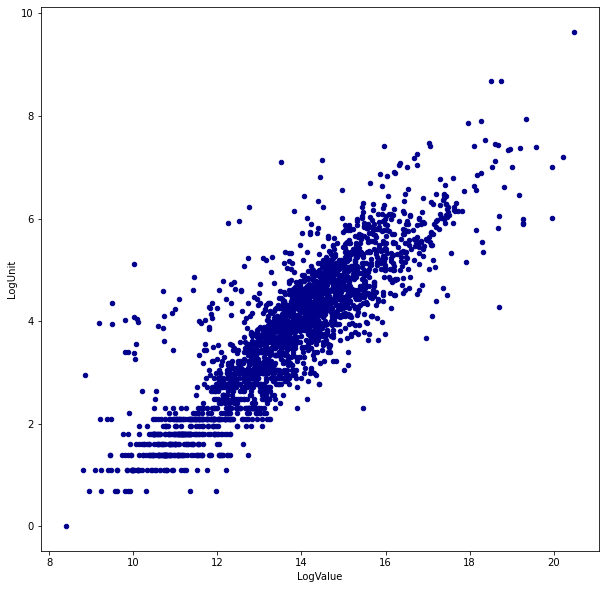

In [27]:
ax1 = housing.plot.scatter(x='LogValue',
                       y='LogUnit',
                      c='DarkBlue'
                          ,figsize=(10,10))

In [28]:
import seaborn as sns

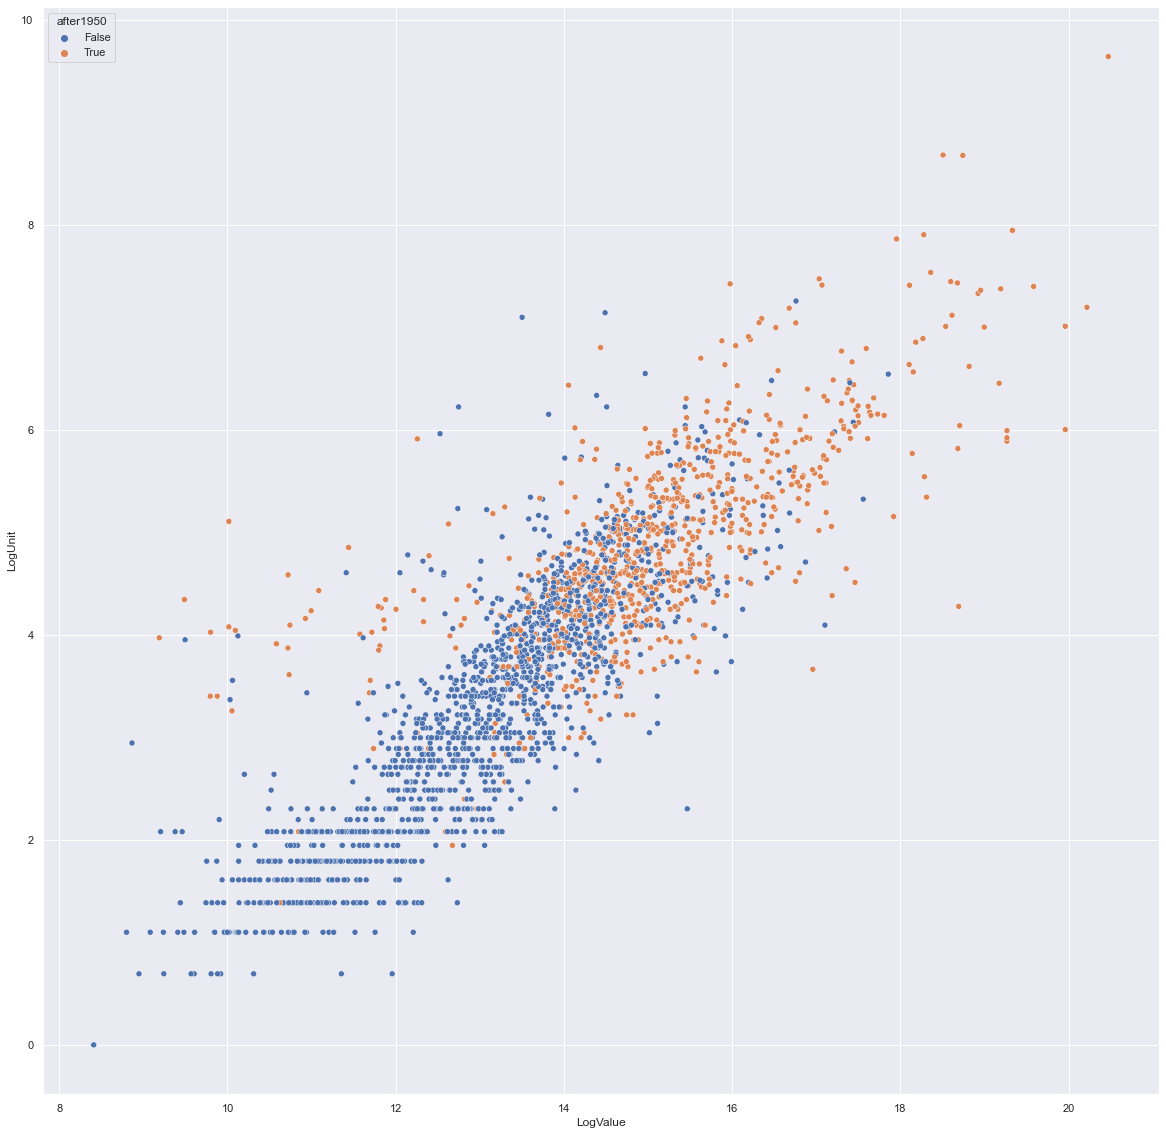

In [62]:
sns.scatterplot(data=housing, x='LogValue', y='LogUnit', hue='after1950')
sns.set(rc = {'figure.figsize':(20,20)})

## Corration

In [30]:
housing.drop("UID",axis=1,inplace=True)

In [31]:
housing["LogValue"].corr(housing["LogUnit"])

0.8727348173470225

In [32]:
housing[housing["Borough"] == "Manhattan"]['LogValue'].corr(housing[housing["Borough"] == "Manhattan"]['LogUnit'])

0.883034790039702

In [33]:
housing[housing["Borough"] == "Brooklyn"]['LogValue'].corr(housing[housing["Borough"] == "Brooklyn"]['LogUnit'])

0.9102600747941764

In [34]:
housing[housing["after1950"] == 'True']['LogValue'].corr(housing[housing["after1950"] == 'True']['LogUnit'])

0.7285898067410995

In [35]:
housing[housing["after1950"] == 'False']['LogValue'].corr(housing[housing["after1950"] == 'False']['LogUnit'])

0.8630975114603181

## ggplot

In [60]:
df2 = (housing[housing['Borough'] == 'Brooklyn'])
df1 = (housing[housing['Borough'] == 'Manhattan']) 

In [61]:
new_data = df2.append(df1,ignore_index = True)

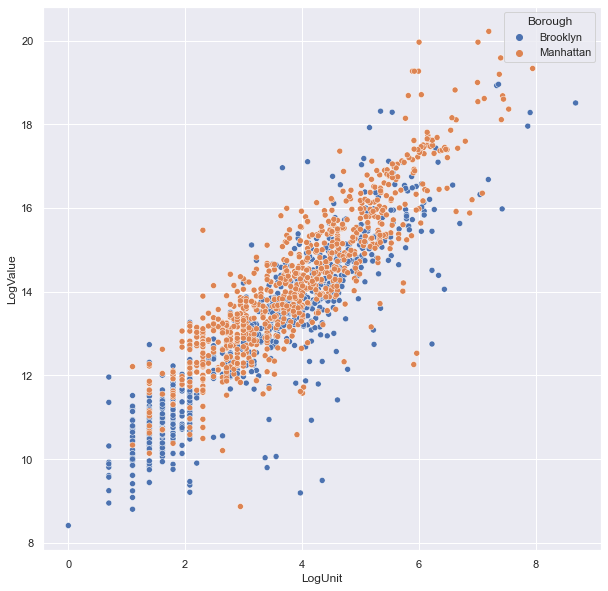

In [69]:
sns.scatterplot(data=new_data, x='LogUnit', y='LogValue', hue='Borough',sizes=(20, 20))
sns.set(rc = {'figure.figsize':(10,10)})